# Introduction to Qiskit

A workshop for Dr.Clarice Aiello's "Quantum Mechanics for Engineers" class, presented on behalf of [If and Only If (Iff) Technologies](https://iff.bio/) by [John Long](https://johnzl-777.github.io)

## Objectives

By the end of this workshop the goal is that you'll have a solid understanding of how to use Qiskit for future projects, with examples showing how to:
* Build Circuits
* Extract the Unitary Matrix representing a circuit and Statevectors
* Simulate Circuits
* Analyze Results

## Why Qiskit?

* Very Beginner Friendly
* Thoroughly documented and well-maintained
* Extremely "broad" (has plenty of high-level quantum algorithms implemented as well as allowing you to pulse-level control of qubits too!)
  * Allows you to pull of a large variety of things while remaining in one framework, so no worries about having to port things over

Ultimately though, the goal is not to make you accept Qiskit as the end-all word in the Quantum Computing space. 
As an engineer your goal is to pick the right tool for the right job and there's no exception in Quantum Computing.
That being said, it certainly makes it easier to pick up other (similar) tools once you've mastered one thoroughly.

## Notebook Structure

This notebook spends its first half dedicated to showing a lot of the core functionality of Qiskit that'll probably cover most of your bases for other projects other you're always encouraged to read the Qiskit documentation (which is quite friendly to read!).

Within that half, you'll start out with just a single qubit circuit and work your way up towards n-qubit functionality. 

The second half is dedicated towards applications that try to give you a better idea of why what you've learned is useful and what you can do in Qiskit

# One Qubit Stuff

In [1]:
# You'll always start off any Quantum circuit with...QuantumCircuit
from qiskit import QuantumCircuit

# Every quantum circuit has some number of quantum registers and classical registers that you get to define in advance
# You can either pass one integer in to denote a fixed number of quantum registers
# OR you can pass in two numbers, the first being the # of quantum registers and the second being the number of classical registers

qc = QuantumCircuit(5) # creates empty circuit with 5 quantum registers
qc = QuantumCircuit(3,1) # creates empty circuit with 3 quantum registers, 1 classical register

# For this part of the workshop, we'll start simple with a one-qubit circuit and gradually work towards 
# larger qubit circuits
qc = QuantumCircuit(1,1)

In [2]:
# A blank circuit isn't really useful to us so lets add some gates!

# There are two ways to add gates, the easier way is to do it like so:

## Apply an X gate to qubit 0 (the only qubit in this circuit)
qc.x(0)

## Or to .append() them to the circuit
## The [0] tells qiskit to apply the gate to the 0th qubit (the first). 
from qiskit.circuit.library import XGate
qc.append(XGate(), [0])

In [3]:
# to see the circuit, we can just use the .draw() method
qc.draw()
# Notice how despite two different methods for adding gates, we still see the same gate!

┌───┐┌───┐
  q: ┤ X ├┤ X ├
     └───┘└───┘
c: 1/══════════

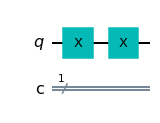

In [4]:
# For a "shinier" representation of our circuit, we can tell Qiskit to leverage matplotlib
qc.draw(output='mpl')

In [5]:
# Awesome! Your first quantum circuit! 
# Before we actually run this on something, lets perform some "sanity checks" 
# We know that applying two pauli operators back to back should return the qubit to its original state (it essentially undoes itself)
# So we expect the unitary matrix to be the identity.
# We can access this information like so 

# Credit to Chistopher J. Wood, lead Qiskit Aer developer: https://quantumcomputing.stackexchange.com/a/14283 
from qiskit.quantum_info import Operator
op = Operator(qc)
op.data

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [6]:
# We can also see what happens to a qubit initialized to |0> when it goes through the unitary
from qiskit.quantum_info import Statevector

# .from_instruction automatically defaults to |0>
state_vec = Statevector.from_instruction(qc)
state_vec.data
# so we remain in the |0> state

array([1.+0.j, 0.+0.j])

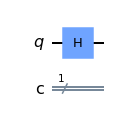

In [7]:
# But a circuit that just ends up being an identity matrix is pretty boring. Why don't we make things more fun with our old friend the
# Hadamard gate?
# Lets create a new circuit and apply it:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.draw(output='mpl')

In [8]:
# Now lets see what the unitary is
Operator(qc).data

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

In [9]:
# And lets see what happens when we send in a qubit with |0>
state_vec = Statevector.from_instruction(qc)
state_vec.data

array([0.70710678+0.j, 0.70710678+0.j])

### Visualization

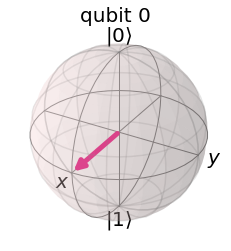

In [10]:
# Sometimes it's nice to visualize the states themselves
# We can always pull out our trusty bloch sphere for one qubit states:

# You'll see in a bit why it's called "plot_bloch_multivector"
# There IS a single plot_bloch_vector but it requires you to convert your state vector into
# cartesian/polar coordinates, which is a lot of unnecessary overhead for what we want to do
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(state_vec)

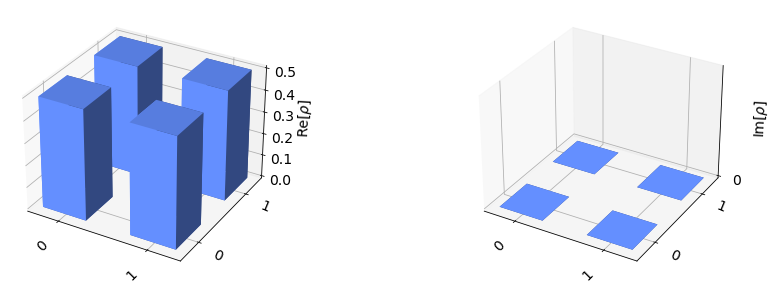

In [11]:
# This allows you to view the density matrix formulation,
# you can see the real and imaginary components of the density matrix
from qiskit.visualization import plot_state_city
plot_state_city(state_vec)

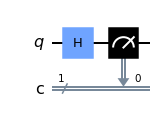

In [12]:
# now lets actually "run" our circuit
# In real world quantum computation, we know the only way to get useful information out of the quantum algorithm is to perform
# a measurement, which collapses the qubit state to one of two values.
# Let's go ahead and add a measurement to our circuit, telling Qiskit to store the result in the classical register
qc.measure(0,0)
qc.draw(output='mpl')

In [13]:
# You can either run your circuit on an ACTUAL quantum computer
# (which means you'll have to create an IBM Q account) or
# most of the time, you can run in on a simulator (which is what we'll do here).

In [14]:
from qiskit.providers.aer import AerSimulator

In [15]:
# There's a wide variety of simulators you can select, see: https://qiskit.org/documentation/stubs/qiskit.providers.aer.AerSimulator.html#qiskit.providers.aer.AerSimulator
# For the majority of purposes, statevector will do fine
backend = AerSimulator(method='statevector')

In [16]:
# shots defines how many times your circuit should run
job = backend.run(qc, shots=1024)
# Every time you run a circuit on a backend (real or simulated) you'll get a "Job" 
# that you can then access results from
result = job.result()
# Here's the counts on each type of measurement
result.get_counts()

{'0': 514, '1': 510}

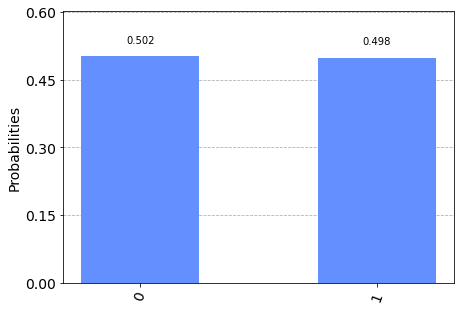

In [17]:
# we can also plot the probabilities via histogram
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts())

In [18]:
# You can also save the state of the quantum circuit AFTER running it on the simulators
# Let's add the following to our quantum circuit
qc.save_state() # <- you can save the statevector after running the experiment and view it later
job = backend.run(qc, shots=1024)
result = job.result()
result.get_statevector()
# not really that interesting

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [19]:
qc = QuantumCircuit(1,1)
qc.h(0)
# note that we can place the save state at an intermediate point as well!
qc.save_state()
qc.measure(0,0)
job = backend.run(qc, shots=1024)
result = job.result()
result.get_statevector()

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


## Custom Initialization

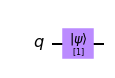

In [20]:
# So far we've always started in |0>
# What if we want to start in some other initial state, like |1> or (|0> + |1>)/sqrt(2)? 
# Qiskit lets us do that with ease!

# for a basis state we can do the following
qc = QuantumCircuit(1) # just for demonstration purposes, we don't need to create a classical register here
qc.initialize('1')
qc.draw(output='mpl')

In [21]:
# we can check it's |1> through the following:
Statevector.from_instruction(qc)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


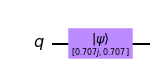

In [22]:
# For a non 0/1 basis state, (some kind of superposition perhaps) we can do the following
from numpy import sqrt
qc = QuantumCircuit(1) # just for demonstration purposes, we don't need to create a classical register here
qc.initialize([1j/sqrt(2), 1/sqrt(2)])
qc.draw(output='mpl')

In [23]:
Statevector.from_instruction(qc)

Statevector([1.11022302e-16+0.70710678j, 7.07106781e-01+0.j        ],
            dims=(2,))


## Custom Gates

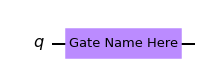

In [24]:
# You may want to build your own gates from matrices at some point
# Qiskit makes this a cinch with UnitaryGate 

import numpy as np
custom_gate_matrix = np.eye(2) # 2x2 identity matrix

qc = QuantumCircuit(1)

from qiskit.extensions import UnitaryGate
custom_gate = UnitaryGate(custom_gate_matrix, label="Gate Name Here")
qc.append(custom_gate, [0])
qc.draw(output='mpl')

## Rotation Gates

In [25]:
# The X, Y, and Z gates are all based on the Pauli matrices and are known for making rotations of pi radians around the bloch sphere
# on each respective axis.
# What if I want to rotate some fractional amount instead of pi?
# Each X,Y,Z gate has a version capable of accepting an argument theta that allows you to explicitly define the amount of rotation
# desired on any axis

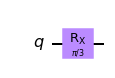

In [26]:
qc = QuantumCircuit(1)
import numpy as np
qc.rx(np.pi/3, 0)
qc.draw(output='mpl')

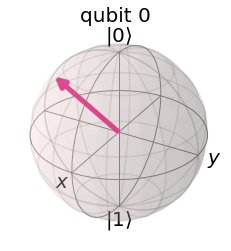

In [27]:
state_vec = Statevector.from_instruction(qc)
plot_bloch_multivector(state_vec)

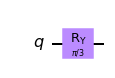

In [28]:
qc = QuantumCircuit(1)
import numpy as np
qc.ry(np.pi/3, 0)
qc.draw(output='mpl')

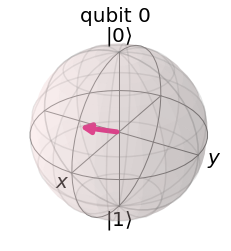

In [29]:
state_vec = Statevector.from_instruction(qc)
plot_bloch_multivector(state_vec)

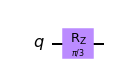

In [30]:
qc = QuantumCircuit(1)
import numpy as np
qc.rz(np.pi/3, 0)
qc.draw(output='mpl')

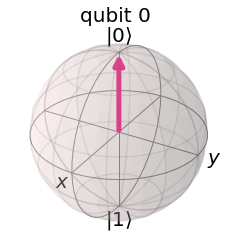

In [31]:
state_vec = Statevector.from_instruction(qc)
plot_bloch_multivector(state_vec)

To Recap you now know
* How to create an empty circuit
* How to add gates to a circuit
* How to obtain the raw statevector and unitary matrix representing a circuit
* How to simulate a circuit
* How to visualize circuit results and qubit states

# Two Qubit Stuff

Lets extend what we know to two qubits!

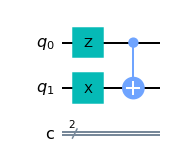

In [32]:
# We can create a two-qubit circuit
qc = QuantumCircuit(2,2)
# Single qubit gates can be applied as usual
qc.z(0)
qc.x(1)
# You can also apply two-qubit gates like so, with the first integer denoting the "control" qubit
# and the second denoting the target
qc.cx(0,1)
qc.draw(output='mpl')

In [33]:
# lets see what the statevector result looks like
state_vec = Statevector.from_instruction(qc)

In [34]:
state_vec

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


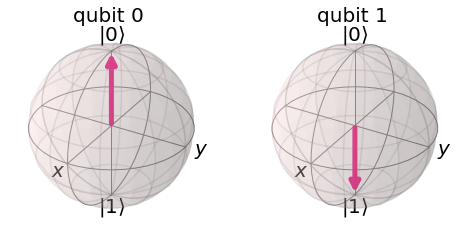

In [35]:
# The current state is separable and can be visualized with TWO bloch spheres
plot_bloch_multivector(state_vec)

A word of caution going forward, Qiskit has the qubit ordering FLIPPED, so 
"For example, if qubit zero is in state 0, qubit 1 is in state 0, and qubit 2 is in state 1, Qiskit would represent this state as |001>" - https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html

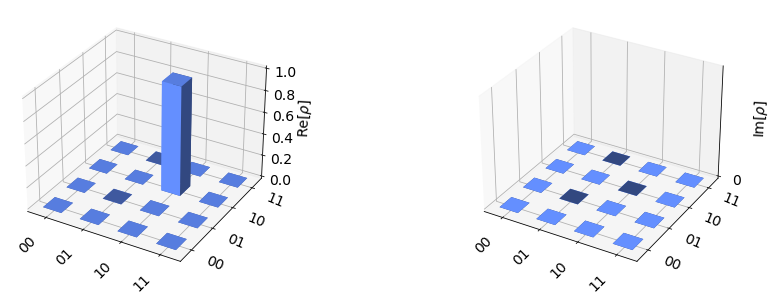

In [36]:
# the statecity plot should also work
plot_state_city(state_vec)

In [37]:
# We can still obtain the unitary
Operator(qc).data

array([[ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

In [38]:
# And the syntax for running simulations does not change as well

## Let's add a measurement to the last operators
## For multiple measurements you can use the "measure_all" method
## If you declared the circuit with no quantum registers, like
## QuantumCircuit(2), measure_all will create classical registers automatically.
## If you declared something like QuantumCircuit(2,2) and classical reigsters ALREADY exist
## then you can invoke it with .measure_all(add_bits=False), otherwise, it'll continue to create
## extra classical registers which you don't need
qc.measure_all(add_bits=False)

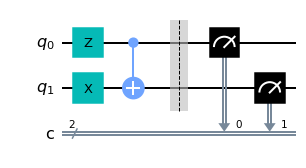

In [39]:
qc.draw(output='mpl')

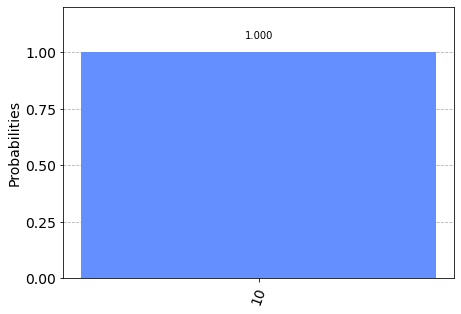

In [40]:
backend = AerSimulator(method='statevector')
job = backend.run(qc, shots=1024)
result = job.result()
plot_histogram(result.get_counts())

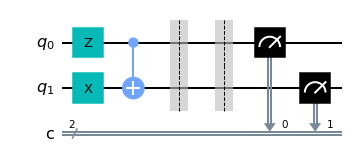

In [41]:
# You can still save the intermediate statevector as well
qc = QuantumCircuit(2,2)
# Single qubit gates can be applied as usual
qc.z(0)
qc.x(1)
qc.cx(0,1)
qc.save_statevector()
qc.measure_all(add_bits=False)
qc.draw(output='mpl')

In [42]:
backend = AerSimulator(method='statevector')
job = backend.run(qc, shots=1024)
result = job.result()
result.get_statevector()

Statevector([ 0.+0.j, -0.+0.j,  1.+0.j, -0.+0.j],
            dims=(2, 2))


## Custom Initialization

With two qubits there are some more options as to what and how you initialize your system to

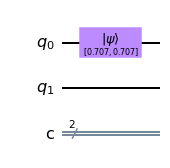

In [43]:
# You can choose one qubit to initalize to a custom state:
qc = QuantumCircuit(2,2)
# Set qubit 0 to be in equal superposition
qc.initialize([1/sqrt(2), 1/sqrt(2)], 0)
qc.draw(output='mpl')

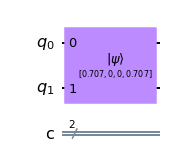

In [44]:
# You can also set the entire system to be in a certain state
qc = QuantumCircuit(2,2)
# Set the system to be in a Bell State, note that I don't have to state the qubits being targeted
# (Although in Qiskit examples, they'll usually be explicit with which qubits were selected)
qc.initialize([1/sqrt(2), 0, 0, 1/sqrt(2)])
qc.draw(output='mpl')

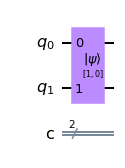

In [45]:
# For initalizations where you just want to pick between starting with |0> or |1> you can do the following:
qc = QuantumCircuit(2,2)
# Keep in mind this sets the SECOND qubit to 1, and the FIRST qubit to 0
qc.initialize("10")
qc.draw(output='mpl')

In [46]:
Statevector.from_instruction(qc)

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


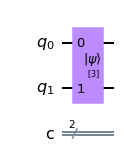

In [47]:
# You can also just pass in an integer
qc = QuantumCircuit(2,2)
# Set qubit 0 to be in equal superposition
qc.initialize(3)
qc.draw(output='mpl')

In [48]:
Statevector.from_instruction(qc)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


## Custom Gates

With more qubits comes more fun!

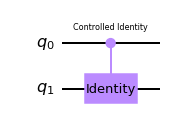

In [49]:
# create a quantum circuit to play around with 
qc = QuantumCircuit(2)

# We create a custom gate
custom_gate = UnitaryGate(np.eye(2), label="Identity")
# Then we get the controlled version, with 1 qubit for control and the qubit in question needing to be in the |1> state to turn on
# the gate
controlled_custom_gate = custom_gate.control(num_ctrl_qubits=1, label="Controlled Identity")

# Add the gate
# The [0,1] here tells qiskit we want qubit 0 to be control, qubit 1 to be the target
qc.append(controlled_custom_gate, [0,1])
qc.draw(output='mpl')

What if we want the control gate to only trigger when we detect |0> instead of |1>? No Worries!

In [50]:
# Note we can pass in ctrl_state as an integer OR as a string of 1s and 0s
controlled_custom_gate = custom_gate.control(num_ctrl_qubits=1, ctrl_state=0, label="Controlled Identity")

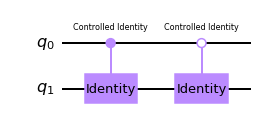

In [51]:
qc.append(controlled_custom_gate, [0,1])
qc.draw(output='mpl')

## A Word on Visualizing Entangled States

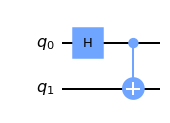

In [52]:
## When an entangled state is created, by definition it is NON-SEPERABLE
## (you cannot split the vector that constitutes it into two separate vectors).

## This does put a wrench into visualization but only partly.
## Observe the following Bell state generating circuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl')

In [53]:
# We get the statevector
state_vec = Statevector.from_instruction(qc)

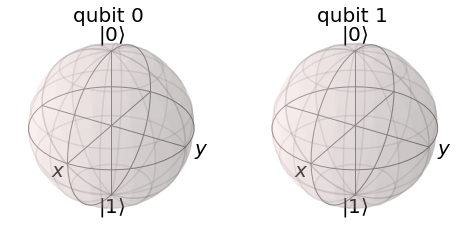

In [54]:
# and try to visualize it...
plot_bloch_multivector(state_vec)

In [55]:
# BEHOLD! You don't get anything
# This is generally the case whenever you run into entanglement, Qiskit will fail to properly display seperate bloch spheres (because it's impossible!)
# You may also still get "something" but the vector is shorter or significantly longer than what it should be (visually)

# However, the Density Matrix can give you more information....

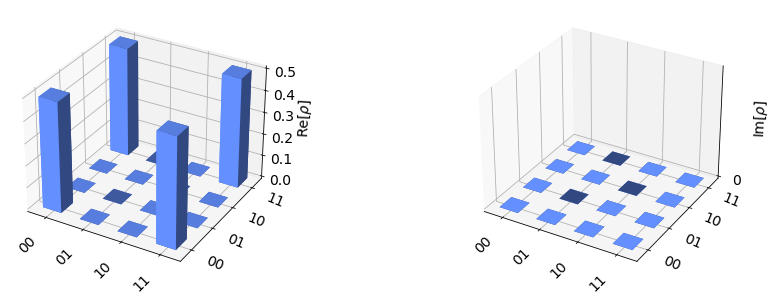

In [56]:
# But we still have one way of seeing things, the state city diagram
plot_state_city(state_vec)

In [57]:
## You can actually figure out if a system has some degree of entanglment by using the trace and reducing the degrees of freedom to individual qubits
## Credit to "Quantum Mechanic" on Stack Overflow https://quantumcomputing.stackexchange.com/questions/17580/how-to-calculate-the-amount-of-entanglement-for-each-qubit-in-a-quantum-computer

# n qubit circuits

There are a couple of other neat things you can do as you have larger and larger circuits...

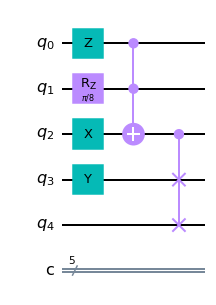

In [58]:
# We can define even larger circuits...
qc = QuantumCircuit(5,5)
# apply some single qubit gates 
qc.rz(np.pi/8, 1)
qc.z(0)
qc.y(3)
qc.x(2)
# apply a CCX or Toffoli gate with 0 and 1 as control qubits, 2 as the target qubit
qc.ccx(0,1,2)
# apply a controlled swap gate
qc.cswap(2,3,4)
qc.draw(output='mpl')

In [59]:
# lets see what the statevector result looks like
state_vec = Statevector.from_instruction(qc)

In [60]:
state_vec

Statevector([0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.19509032+0.98078528j, 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ],
            dims=(2, 2,

In [61]:
# can still see what the unitary matrix looks like
unitary_mat = Operator(qc)
unitary_mat

Operator([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
          ...,
          [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2))

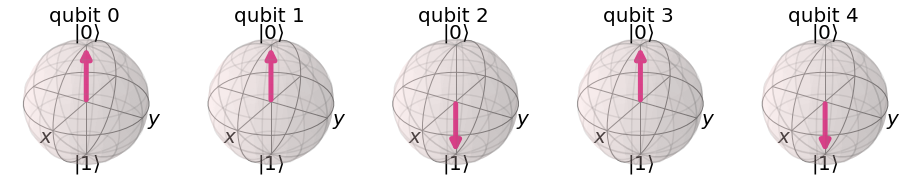

In [62]:
# Should be able to visualize all the qubits too!
plot_bloch_multivector(state_vec)

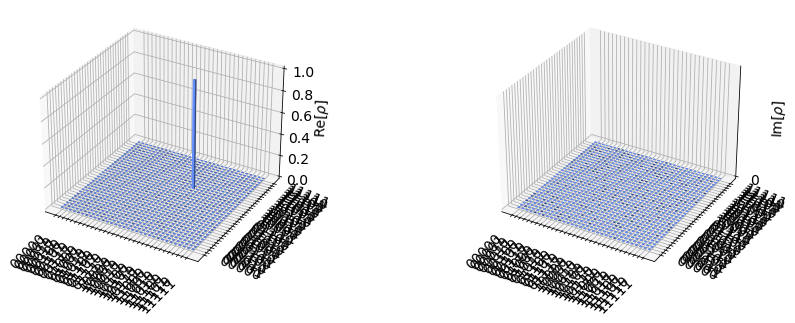

In [63]:
# Should be able to visualize all the qubits too!
plot_state_city(state_vec)

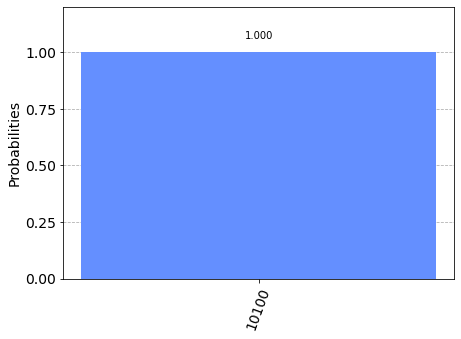

In [64]:
# Rules for simulation remain the same
## Add measurement gets
qc.measure_all(add_bits=False)
job = backend.run(qc, shots=1024)
result = job.result()
plot_histogram(result.get_counts())

## Custom Initialization

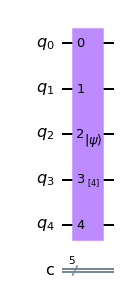

In [65]:
# We can still initialize our circuits to custom states
qc = QuantumCircuit(5,5)
qc.initialize(4) # initialized to |00100>
qc.draw(output='mpl')

In [66]:
Statevector.from_instruction(qc)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2))


## Custom Gates

### Custom Controlled Gates (Continued)

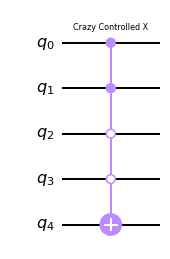

In [67]:
# Now that we have all these extra qubits, we can do some pretty crazy stuff with defining controlled gates.
# For example, lets say we want a controlled X gate that only applies when the control qubits have the state "0011"
# In such a case we can just piggyback off of the fact that Qiskit already has an X gate and build up from it

from qiskit.circuit.library import XGate
# keep in mind that the ordering is flipped for qubits in qiskit!
custom_controlled_X = XGate().control(num_ctrl_qubits=4, ctrl_state="0011", label="Crazy Controlled X")

qc = QuantumCircuit(5)
qc.append(custom_controlled_X, [0,1,2,3,4])
qc.draw(output='mpl')

In [68]:
# Let's test the circuit. 
# We expect that for any other initialized state, nothing should happen and the initialied state stays as is
qc = QuantumCircuit(5)
qc.initialize(0)
qc.append(custom_controlled_X, [0,1,2,3,4])
Statevector.from_instruction(qc)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2))


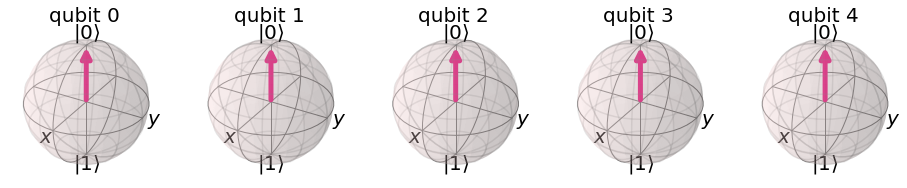

In [69]:
plot_bloch_multivector(Statevector.from_instruction(qc))

In [70]:
# ...and if we set the initial state right then the gate gets applied
qc = QuantumCircuit(5)
qc.initialize("00011")
qc.append(custom_controlled_X, [0,1,2,3,4])
Statevector.from_instruction(qc)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2))


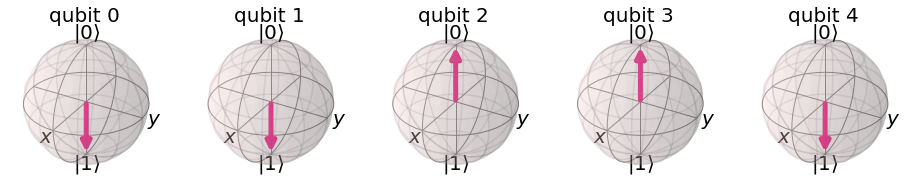

In [71]:
plot_bloch_multivector(Statevector(qc))
# Note that we flipped qubit 4, the one we wanted to target!

## Custom Gates from Circuits

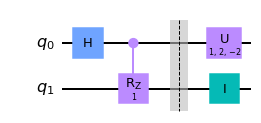

In [72]:
# Sometimes you'll find that it's easier when building custom gates to go ahead and build it out in a separate circuit and then treat
# that circuit as a whole gate entirely (kind of like when you write a large computer program and you call multiple functions,
# or when you have a long essay with lots of individual paragraphs you work on)

# We can do that like so (taken from https://qiskit.org/documentation/tutorials/circuits_advanced/01_advanced_circuits.html#Composite-Gates
# slightly modified for this tutorial)

sub_circ = QuantumCircuit(2, name='sub_circ')
sub_circ.h(0)
# theta is set to 1, with control qubit 0 and target 1
sub_circ.crz(1,0,1)
# A barrier is usually used as a way to explicitly split up certain parts of the circuit for visual purposes 
# in most tutorials, although it actually has a role in telling the transpiler not to optimize 
# "The barrier acts as a directive for circuit compilation to separate pieces of a circuit so that any optimizations or 
# This only comes into play when using the transpile or execute functions in Qiskit (execute includes a transpile step)."
# re-writes are constrained to only act between barriers (and if there are no barriers they act on the whole circuit). - Christopher J. Wood, Lead Developer for Qiskit Aer
sub_circ.barrier()
sub_circ.id(1)
# The U gate takes several parameters and is a kind of universal gate capable of performing a rotation in ANY direction
sub_circ.u(1,2,-2,0)
sub_circ.draw(output='mpl')

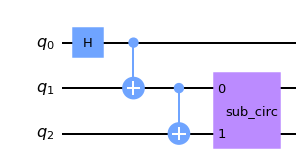

In [73]:
# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()

qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.append(sub_inst, [1,2])

qc.draw(output='mpl')

NOTE: If you try to simulate the circuit off the bat, you'll run into an error saying that "sub_circ" isn't recognized. In a real FULL execution pipeline, a lot of the gates you see are decomposed into another gate set that the hardware or backend natively supports (ex: a Toffoli ends up being a bunch of CNOTs and intermediate single qubit gates). Usually when you run into such errors you have to use the ".decompose()" method which will convert your circuit back to individual gates. You'll see an example of what I mean when we get to the Grover's Algorithm example!

# Grover's Algorithm

Based on https://github.com/QC-at-Davis/Grovers-Algorithm/blob/main/Implementation.ipynb

I've been told you already know this algorithm so I won't spend too much time on the mechanics and focus more on the code

In [74]:
# register naming code obtained from: 
# https://quantumcomputing.stackexchange.com/questions/2177/how-can-i-implement-an-n-bit-toffoli-gate
# credits to Ali Javadi for their answer

# label our qubits
# Note that you can also explicitly declare your Quantum and Classical Registers as separate entities and then
# initialize a QuantumCircuit with them, although QuantumCircuit(n,m) will do just fine as well if you don't care much for register labeling
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
n = 3
function_inputs = QuantumRegister(n, "x")
target = QuantumRegister(1, "f(x)")
# store our results here
classical_registers = ClassicalRegister(3)

circuit = QuantumCircuit(function_inputs, target, classical_registers)

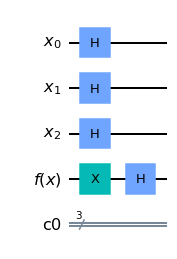

In [75]:
# Initialization phase

# apply Hadamards to three qubits
circuit.h(0)
circuit.h(1)
circuit.h(2)

# Get the last hadamard in the kickback position
circuit.x(3)
circuit.h(3)

circuit.draw(output="mpl")

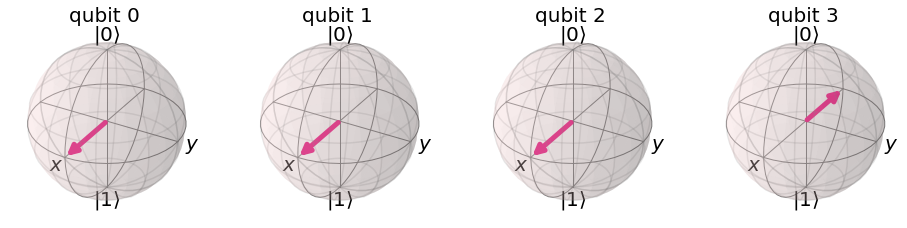

In [76]:
# visualize the current state after execution
plot_bloch_multivector(Statevector.from_instruction(circuit))

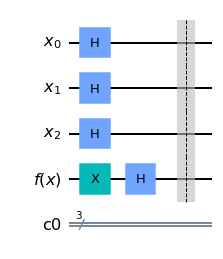

In [77]:
circuit.barrier()
circuit.draw(output='mpl')

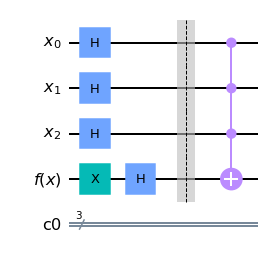

In [78]:
# Create an Oracle
# In this case, we want to solve for (x0 AND x1 AND x2)

# Note that when the circuit actually gets run on hardware, the gate actually gets 
# broken down into smaller gates (so this one may get broken down in CCX gates, and even further 
# to CX and other single qubit gates) that are native to the hardware (the hardware 
# may only support
# a certain subset of gates, although that subset is capable of generating any other 
# gate's operations

# Inspiration for Oracle from: https://cnot.io/quantum_algorithms/grover/grovers_algorithm.html
# as well as Ryan LaRose's QuIC Seminar notes on Grover's Algorithm: 
# https://www.ryanlarose.com/uploads/1/1/5/8/115879647/grover.pdf

circuit.mcx([0,1,2],3)
circuit.draw(output="mpl")

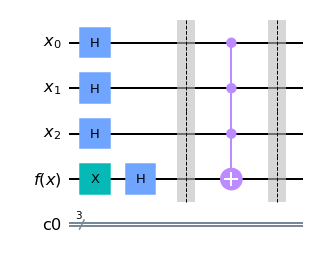

In [79]:
# oracle complete, put the barrier down
circuit.barrier()
circuit.draw(output="mpl")

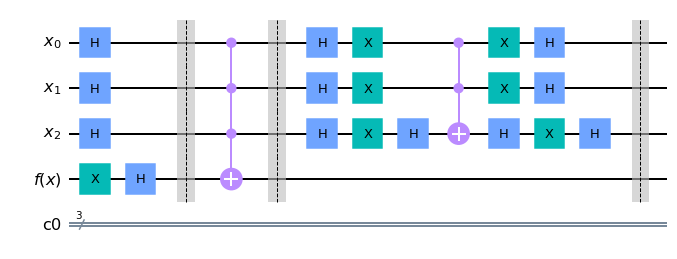

In [80]:
# Oracle implementation taken from Eric Li (https://you.stonybrook.edu/qcomputing/2018/07/18/2-3-qubit-grovers-algorithm/)
# and Martin Vesely (https://quantumcomputing.stackexchange.com/questions/9531/grover-diffusion-operator-for-a-3-qubit-system)
for i in range(3):
    circuit.h(i)

# 2|0><0| - I
for i in range(3):
    circuit.x(i)
circuit.h(2)
circuit.mcx([0,1],2)
circuit.h(2)
for i in range(3):
    circuit.x(i)

for i in range(3):
    circuit.h(i)
circuit.barrier()
circuit.draw(output="mpl")

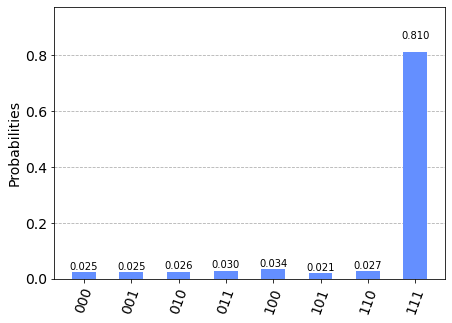

In [81]:
# get results
# .measure_all fails here because there isn't an equal number of classical regsiters, so we have to resort to the next best thing
# circuit.measure_all(add_bits=False)
# Need to explicitly declare which quantum bit gets measured to which classical bit
circuit.measure([0,1,2],[0,1,2])

backend = AerSimulator(method='statevector')
job = backend.run(circuit, shots=1024)
result = job.result()
plot_histogram(result.get_counts())

## One More Time?

We know that if we apply the Oracle and Grover's Operator in succession that, up to a certain point, we can amplify the amplitude of the correct answer.

But first, let's tidy things up. 
We know in any application of Grover's algorithm we'll always have an oracle and we'll always have the Grover/Diffusion Operator.
We can convert these into custom gates that make it easier to apply them repeatedly.

In [82]:
# Create a custom gate representing the oracle
from qiskit.circuit.library import MCXGate

oracle = MCXGate(num_ctrl_qubits=3, label="oracle", ctrl_state="111")

In [83]:
# create a custom gate representing the diffusion operator
grover_op_circ = QuantumCircuit(3, name="Grover's Operator")

for i in range(3):
    grover_op_circ.h(i)

# 2|0><0| - I
for i in range(3):
    grover_op_circ.x(i)
grover_op_circ.h(2)
grover_op_circ.mcx([0,1],2)
grover_op_circ.h(2)
for i in range(3):
    grover_op_circ.x(i)

for i in range(3):
    grover_op_circ.h(i)

In [84]:
# Now rebuild the original circuit using our newly defined custom gates

In [85]:
n = 3
function_inputs = QuantumRegister(n, "x")
target = QuantumRegister(1, "f(x)")
# store our results here
classical_registers = ClassicalRegister(3)

qc = QuantumCircuit(function_inputs, target, classical_registers)

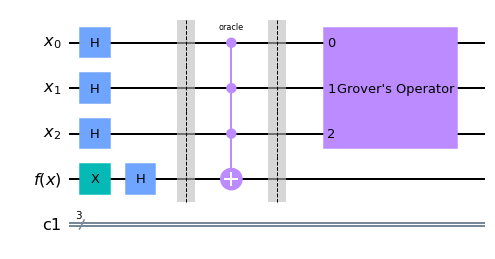

In [86]:
# apply Hadamards to three qubits
qc.h(0)
qc.h(1)
qc.h(2)

# Get the last hadamard in the kickback position
qc.x(3)
qc.h(3)

qc.barrier()

qc.append(oracle, [0,1,2,3])

qc.barrier()

qc.append(grover_op_circ.decompose(), [0,1,2])

qc.draw(output='mpl')

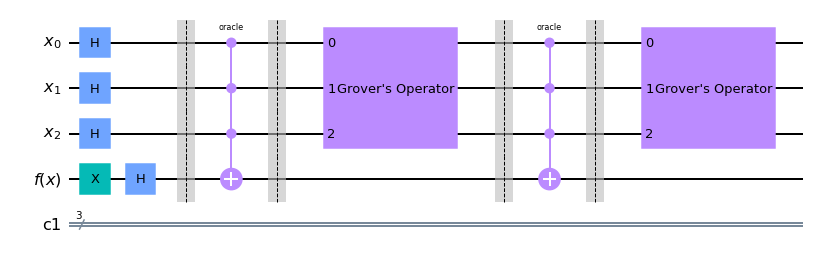

In [87]:
# now we apply the same things again 
qc.barrier()

qc.append(oracle, [0,1,2,3])

qc.barrier()

qc.append(grover_op_circ.to_instruction(), [0,1,2])

qc.draw(output='mpl')

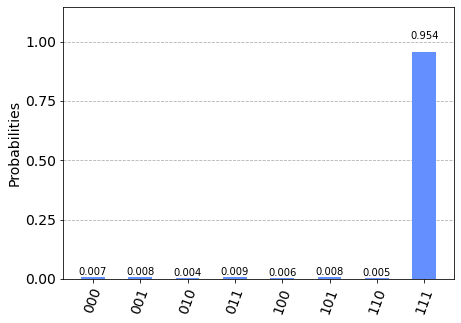

In [88]:
# Now let's see how the results hold up
qc.measure([0,1,2],[0,1,2])

backend = AerSimulator(method='statevector')
job = backend.run(qc.decompose(), shots=1024)
result = job.result()
plot_histogram(result.get_counts())

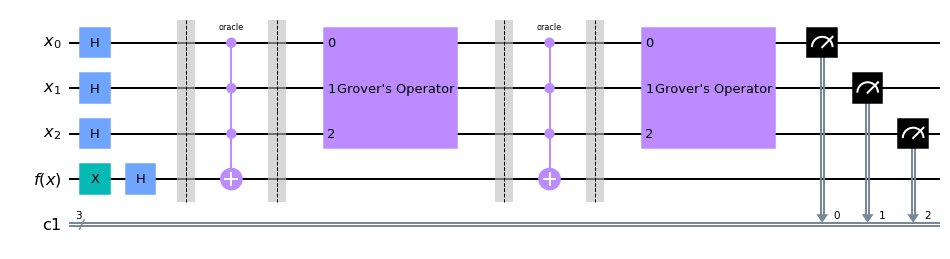

In [89]:
qc.draw(output='mpl')

## Given's Rotation (Partially Working)

~~A fantastic way to turn my hasty work into a learning experience for you guys!~~
An exercise in debugging Quantum Circuits

"...a rotation in a two-dimensional subspace of a larger Hilbert space. In this case, we are performing a Givens rotation in a two-dimensional subspace of the four-dimensional space of two-qubit states." - https://pennylane.ai/qml/demos/tutorial_givens_rotations.html

Attempt to implement an IonQ supported Givens Rotation, taken from: http://arxiv.org/abs/2004.04174

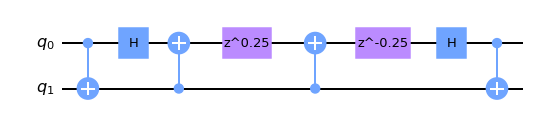

In [90]:
# Create Sqrt iSWAP gate
from qiskit.circuit.library import ZGate

# Obtained from: https://github.com/quantumlib/Cirq/blob/a22269dfe41b0da78243bbd210a915d26cc7d25f/cirq-core/cirq/ops/swap_gates.py#L166
sqrt_iSWAP_circ = QuantumCircuit(2, name="sqrt(iSWAP)")
sqrt_iSWAP_circ.cx(0,1)
sqrt_iSWAP_circ.h(0)
sqrt_iSWAP_circ.cx(1,0)
sqrt_iSWAP_circ.append(ZGate().power(0.25), [0])
sqrt_iSWAP_circ.cx(1,0)
sqrt_iSWAP_circ.append(ZGate().power(-0.25), [0])
sqrt_iSWAP_circ.h(0)
sqrt_iSWAP_circ.cx(0,1)

sqrt_iSWAP_circ.draw(output='mpl')

In [91]:
# Create the full IonQ supported Given's Rotation
from qiskit.circuit import Parameter
import numpy as np

# You can create a Parameter that you later bind values to during execution
theta = Parameter('θ')
givens_circ = QuantumCircuit(2, name="Givens Rotation")

givens_circ.append(sqrt_iSWAP_circ.to_instruction(), [0,1])
givens_circ.rz(-theta, 0)
givens_circ.rz(theta + np.pi, 1)
givens_circ.append(sqrt_iSWAP_circ.to_instruction(), [0,1])
givens_circ.rz(np.pi, 1)

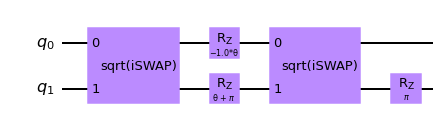

In [92]:
givens_circ.draw(output='mpl')

In [93]:
print(givens_circ.parameters)

ParameterView([Parameter(θ)])


In [94]:
# Full simulation
qc = QuantumCircuit(2)
# Initialize the circuit to be a full, even superpositon (equivalent of putting two hadamards)
full_superposition = [1/np.sqrt(4)] * 4
qc.initialize(full_superposition)
qc.append(givens_circ.bind_parameters({theta: np.pi/3}).to_instruction(), [0,1])

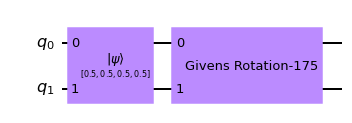

In [95]:
qc.draw(output='mpl')

In [96]:
# hmmm, close but not quite right
np.round(Statevector.from_instruction(qc).data.reshape(4,1), 3)

array([[-0.5  -0.j],
       [-0.683+0.j],
       [ 0.183-0.j],
       [-0.5  +0.j]])

In [97]:
# taken from https://medium.com/mdr-inc/checking-the-unitary-matrix-of-the-quantum-circuit-on-qiskit-5968c6019a45
# All credit to Yuchiro Minato
from qiskit import Aer, execute
# The Unitary simulator only works with circuits that have NO MEASUREMENT GATES
# but allows you to get the unitary representing the matrix.
# Operator() fails to work if your circuit contains a custom initialization value
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

In [98]:
print(result.get_unitary(qc, decimals=3))

Operator([[-0.5  +0.j,  0.5  +0.j,  0.5  +0.j, -0.5  +0.j],
          [-0.683+0.j,  0.183+0.j, -0.183-0.j,  0.683-0.j],
          [ 0.183-0.j,  0.683-0.j, -0.683+0.j, -0.183+0.j],
          [-0.5  +0.j, -0.5  +0.j, -0.5  +0.j, -0.5  +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [99]:
# This unitary comes from the correct implementation from: https://github.com/QC-at-Davis/GroveFold/blob/feature/vectoradditionfrombiomoleculesusingbiopython/src/scripts/IonQ-Givens-Cirq-Simulation.ipynb
# (literally copied and pasted here, then converted back into a matrix)
x =np.array([[-1.       -1.34015774e-16j,  0.       +0.00000000e+00j,
         0.       +0.00000000e+00j,  0.       -3.72797834e-17j],
       [ 0.       +0.00000000e+00j, -0.5      -5.88784672e-17j,
         0.8660254+1.17756934e-16j,  0.       +0.00000000e+00j],
       [ 0.       +0.00000000e+00j, -0.8660254+5.88784672e-17j,
        -0.5      +1.96261557e-16j,  0.       +0.00000000e+00j],
       [ 0.       -2.29934717e-17j,  0.       -0.00000000e+00j,
         0.       -0.00000000e+00j, -1.       +3.51298275e-16j]])

In [100]:
# Note certain entries seem to be flipped...
np.round(x, 3)

array([[-1.   -0.j,  0.   +0.j,  0.   +0.j,  0.   -0.j],
       [ 0.   +0.j, -0.5  -0.j,  0.866+0.j,  0.   +0.j],
       [ 0.   +0.j, -0.866+0.j, -0.5  +0.j,  0.   +0.j],
       [ 0.   -0.j,  0.   +0.j,  0.   +0.j, -1.   +0.j]])

In [101]:
y = np.array([1/sqrt(4)] * 4).reshape(4, 1)

In [102]:
x @ y

array([[-0.5      -8.56477787e-17j],
       [ 0.1830127+2.94392334e-17j],
       [-0.6830127+1.27570012e-16j],
       [-0.5      +1.64152402e-16j]])